In [116]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict
%matplotlib inline

# Read CSV
df = pd.read_csv("data/regularite-mensuelle-tgv.csv", encoding="latin_1", sep=';')

# Drop NaN values
df = df.dropna(subset=df.columns.drop('Commentaires'))

# Create additional column with city set 
df["cities"] = list(map(lambda a, b: frozenset([a, b]), df["Départ"], df["Arrivée"]))

# Groupby Date and Cities
g1 = df.groupby(["Date", "cities"]).sum()
g1 = g1.reset_index()
g1["Régularité"] = 1 - 1.0*(g1["Nombre de trains annulés"] + g1["Nombre de trains en retard à l'arrivée"])\
    /g1["Nombre de trains programmés"]
g1["year"] = list(map(lambda x: int(x[0:4]), g1.Date))
g1["month"] = list(map(lambda x: int(x[5:]), g1.Date))
g1["datetime"]=pd.to_datetime(g1.Date)

# train_lines dictionnary binds train lines names with the rail sections that are concerned. This dictionnary is then used to
# aggregate the total number of trains running on a specific rail section.

train_lines = defaultdict()
train_lines[frozenset(['NICE VILLE', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 'S1_1_1_1_2_1', 
                                                        'S1_1_1_1_2_1_2', 'S1_1_1_1_2_1_2_1', 'S1_1_1_1_2_1_2_1_1', 
                                                        'S1_1_1_1_2_1_2_1_1_1']
train_lines[frozenset(['PARIS LYON', 'TOULON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 'S1_1_1_1_2_1', 
                                                    'S1_1_1_1_2_1_2', 'S1_1_1_1_2_1_2_1', 'S1_1_1_1_2_1_2_1_1']
train_lines[frozenset(['MARSEILLE ST CHARLES', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 'S1_1_1_1_2_1', 
                                                                  'S1_1_1_1_2_1_2', 'S1_1_1_1_2_1_2_1']
train_lines[frozenset(['AIX EN PROVENCE TGV', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 'S1_1_1_1_2_1', 
                                                                 'S1_1_1_1_2_1_2']
train_lines[frozenset(['AVIGNON TGV', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 'S1_1_1_1_2_1']
train_lines[frozenset(['PARIS LYON', 'VALENCE ALIXAN TGV'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2']
train_lines[frozenset(['PARIS MONTPARNASSE', 'TOURS'])] = ['A1','A1_2']
train_lines[frozenset(['CHAMBERY CHALLES LES EAUX', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_3']
train_lines[frozenset(['BELLEGARDE (AIN)', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_3','S1_1_1_1_3_3']
train_lines[frozenset(['ANNECY', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_3','S1_1_1_1_3_2']
train_lines[frozenset(['METZ', 'PARIS EST'])] = ['E1','E1_1']
train_lines[frozenset(['BORDEAUX ST JEAN', 'PARIS MONTPARNASSE'])] = ['A1','A1_2','A1_2_1','A1_2_1_2','A1_2_1_2_1']
train_lines[frozenset(['LE CREUSOT MONTCEAU MONTCHANIN', 'PARIS LYON'])] = ['S1','S1_1']
train_lines[frozenset(['DUNKERQUE', 'PARIS NORD'])] = ['N1','N1_3','N1_3_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'TOULOUSE MATABIAU'])] = ['A1','A1_2','A1_2_1','A1_2_1_2','A1_2_1_2_1',
                                                                       'A1_2_1_2_1_1']
train_lines[frozenset(['LILLE', 'PARIS NORD'])] = ['N1','N1_2']
train_lines[frozenset(['LILLE', 'MARSEILLE ST CHARLES'])] = ['N1','N1_2','S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2', 
                                                             'S1_1_1_1_2_1','S1_1_1_1_2_1_2','S1_1_1_1_2_1_2_1']
train_lines[frozenset(['LYON PART DIEU', 'MARSEILLE ST CHARLES'])] = ['S1_1_1_1_2','S1_1_1_1_2_1','S1_1_1_1_2_1_2',
                                                                      'S1_1_1_1_2_1_2_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'QUIMPER'])] = ['A1','A1_1','A1_1_1','A1_1_1_3','A1_1_1_3_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'RENNES'])] = ['A1','A1_1','A1_1_1']
train_lines[frozenset(['ANGERS SAINT LAUD', 'PARIS MONTPARNASSE'])] = ['A1','A1_1','A1_1_2']
train_lines[frozenset(['NANTES', 'STRASBOURG'])] = ['A1','A1_1','A1_1_2','A1_1_2_1','E1','E1_1','E1_1_1']
train_lines[frozenset(['MULHOUSE VILLE', 'PARIS LYON'])] = ['S1','S1_2','S1_2_1','S1_2_1_1']
train_lines[frozenset(['NANTES', 'PARIS MONTPARNASSE'])] = ['A1','A1_1','A1_1_2','A1_1_2_1']
train_lines[frozenset(['LYON PART DIEU', 'MONTPELLIER'])] = ['S1_1_1_1_2','S1_1_1_1_2_1','S1_1_1_1_2_1_1','S1_1_1_1_2_1_1_1']
train_lines[frozenset(['LYON PART DIEU', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'ST MALO'])] = ['A1','A1_1','A1_1_1','A1_1_1_1']
train_lines[frozenset(['LYON PART DIEU', 'RENNES'])] = ['A1','A1_1','A1_1_1','S1','S1_1','S1_1_1','S1_1_1_1']
train_lines[frozenset(['MONTPELLIER', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2','S1_1_1_1_2_1',
                                                         'S1_1_1_1_2_1_1','S1_1_1_1_2_1_1_1']
train_lines[frozenset(['ANGOULEME', 'PARIS MONTPARNASSE'])] = ['A1','A1_2','A1_2_1','A1_2_1_2']
train_lines[frozenset(['GRENOBLE', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_3','S1_1_1_1_3_1']
train_lines[frozenset(['PARIS EST', 'STRASBOURG'])] = ['E1','E1_1','E1_1_1']
train_lines[frozenset(['PARIS LYON', 'SAINT ETIENNE CHATEAUCREUX'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_1']
train_lines[frozenset(['DIJON VILLE', 'PARIS LYON'])] = ['S1','S1_2']
train_lines[frozenset(['PARIS MONTPARNASSE', 'ST PIERRE DES CORPS'])] = ['A1','A1_2']
train_lines[frozenset(['NANCY', 'PARIS EST'])] = ['E1','E1_1']
train_lines[frozenset(['NIMES', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2','S1_1_1_1_2_1','S1_1_1_1_2_1_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'POITIERS'])] = ['A1','A1_2','A1_2_1']
train_lines[frozenset(['LA ROCHELLE VILLE', 'PARIS MONTPARNASSE'])] = ['A1','A1_2','A1_2_1','A1_2_1_1']
train_lines[frozenset(['LILLE', 'LYON PART DIEU'])] = ['N1','N1_2','S1','S1_1','S1_1_1','S1_1_1_1']
train_lines[frozenset(['PARIS MONTPARNASSE', 'VANNES'])] = ['A1','A1_1','A1_1_1','A1_1_1_3']
train_lines[frozenset(['ARRAS', 'PARIS NORD'])] = ['N1','N1_3']
train_lines[frozenset(['PARIS LYON', 'PERPIGNAN'])] = ['S1','S1_1','S1_1_1','S1_1_1_1','S1_1_1_1_2','S1_1_1_1_2_1',
                                                         'S1_1_1_1_2_1_1','S1_1_1_1_2_1_1_1','S1_1_1_1_2_1_1_1_1']
train_lines[frozenset(['LE MANS', 'PARIS MONTPARNASSE'])] = ['A1','A1_1']
train_lines[frozenset(['MACON LOCHE', 'PARIS LYON'])] = ['S1','S1_1','S1_1_1']
train_lines[frozenset(['DOUAI', 'PARIS NORD'])] = ['N1','N1_1']
train_lines[frozenset(['BESANCON FRANCHE COMTE TGV', 'PARIS LYON'])] = ['S1','S1_2','S1_2_1']
train_lines[frozenset(['BREST', 'PARIS MONTPARNASSE'])] = ['A1','A1_1','A1_1_1','A1_1_1_2']
train_lines[frozenset(['PARIS EST', 'REIMS'])] = ['E1']
train_lines[frozenset(['LAVAL', 'PARIS MONTPARNASSE'])] = ['A1','A1_1']

# assign the different rail sections list to each dataframe entry
g1["line_section"] = list(map(lambda x: train_lines[x], g1.cities))

# duplicate rows for each rail section. set line_section value to line section name
g2 = pd.DataFrame()
for ii in range(len(g1)):
    for jj in range(len(g1['line_section'][ii])):
        row = g1.iloc[ii,:].copy()
        row.loc['line_section'] = g1.loc[ii,'line_section'][jj]
        g2 = g2.append(row,ignore_index=True)

# Groupby line_section
g3 = g2.groupby(["Date", "line_section"]).sum()
g3 = g3.reset_index()
g3["regularity"] = 1 - 1.0*(g3["Nombre de trains annulés"] + g3["Nombre de trains en retard à l'arrivée"])\
    /g3["Nombre de trains programmés"]
g3["year"] = list(map(lambda x: int(x[0:4]), g3.Date))
g3["month"] = list(map(lambda x: int(x[5:]), g3.Date))
g3["datetime"]=pd.to_datetime(g3.Date)
g3.head()

# export to tsv file
g3.to_csv('data/test.tsv', sep='\t', columns=['Date','year','month','line_section','regularity'], index=False)

In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795 entries, 0 to 5799
Data columns (total 11 columns):
Date                                      5795 non-null object
Axe                                       5795 non-null object
Départ                                    5795 non-null object
Arrivée                                   5795 non-null object
Nombre de trains programmés               5795 non-null float64
Nombre de trains ayant circulé            5795 non-null float64
Nombre de trains annulés                  5795 non-null float64
Nombre de trains en retard à l'arrivée    5795 non-null float64
Régularité                                5795 non-null float64
Commentaires                              1079 non-null object
cities                                    5795 non-null object
dtypes: float64(5), object(6)
memory usage: 543.3+ KB


In [114]:
g3.head()

,Date,line_section,Nombre de trains annulés,Nombre de trains ayant circulé,Nombre de trains en retard à l'arrivée,Nombre de trains programmés,Régularité,month,year,datetime
0,2011-09,A1,0,10752,806,10752,0.925037,9,2011,2011-09-01
1,2011-09,A1_1,0,6023,398,6023,0.933920,9,2011,2011-09-01
2,2011-09,A1_1_1,0,2391,139,2391,0.941865,9,2011,2011-09-01
3,2011-09,A1_1_1_1,0,114,1,114,0.991228,9,2011,2011-09-01
4,2011-09,A1_1_1_2,0,372,16,372,0.956989,9,2011,2011-09-01


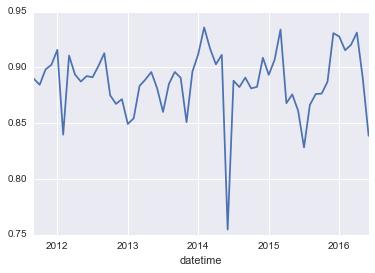

In [104]:
g3_sub = g3[g3['line_section'] == 'S1']
g3_sub.groupby("datetime").mean()["Régularité"].plot()

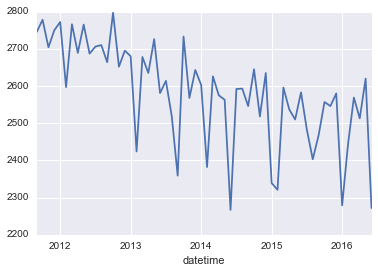

In [112]:
g3_sub = g3[g3['line_section'] == 'E1']
g3_sub.groupby("datetime").mean()["Nombre de trains ayant circulé"].plot()